Authors: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importFiles import import_from_aux
from summary import groupLevel

This script will import raw data from AUX and build a local database containing only essential files for further preprocessing. You can select where to store these file by changing `localPath`.

In [2]:
%%capture
serverPath = 'Z:/MINDLAB2019_Visceral-Mind/1_VMP_aux/'
localPath = 'C:/Users/au646069/ECG/1_VPN_aux/'
import_from_aux(localPath, serverPath)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Z:/MINDLAB2019_Visceral-Mind/1_VMP_aux/'

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
datapath = 'C:/Users/au646069/ECG/1_VPN_aux/'
subList = os.listdir(datapath)

### Data quality

**HRD**
* Subject 44, 45, 46, 74, 141, 191, 249: data missing

*Logs:*
* Subject 27: rename file (28->27)
* Subject 81: incorrect file name (081)
* Subject 191, 223: data missing, but should be present

*To remove:*
* Subject 36: invalid responses -> remove
* Subject 54: noisy PPG -> remove
* Subject 67: invalid responses
* Subject 84: bad confidence ratings -> remove
* Subject 143: half of the task has invalid ppg signal

**HBC**
* Subject 160, 177, 202, 223: data missing

*Logs:*
* Subject 187: data missing but should be present.
* Subject 21, 31, 44, 45, 49, 50, 62, 223: missing data?
* Subject 25, 41: incomplete (crash?)

**HRD2**
* Subject 20, 21, 29, 30, 36, 40, 41, 43, 48, 51, 54, 55, 62, 69, 75, 77, 88, 91, 105, 110, 111, 129, 155, 158, 182, 199, 205, 221, 227, 239, 256: data missing

*Logs:*
* Subject 123: data missing but should be present.

In [11]:
group_df, merged_df = groupLevel(datapath=datapath, subjects=subList, verbose=False)

Drop bad data

In [12]:
remove = ['sub_0036', 'sub_0054', 'sub_0067', 'sub_0084', 'sub_0143']
for sub_rm in remove:
    group_df = group_df[group_df.Subject != sub_rm]
    merged_df = merged_df[merged_df.Subject != sub_rm]

In [13]:
group_df.to_csv(path + '/data/behavior.txt')
merged_df.to_csv(path + '/data/merged.txt')

## Task descriptive stats

In [14]:
group_df = pd.read_csv(path + '/data/behavior.txt')

In [15]:
print(f'Number of participants: {len(group_df.Subject.unique())}')
del1 = len(group_df[group_df.Session=='Del1'].Subject.unique())
del2 = len(group_df[group_df.Session=='Del2'].Subject.unique())
print(f'Del 1: {del1}')
print(f'Del 2: {del2}')

Number of participants: 219
Del 1: 214
Del 2: 152


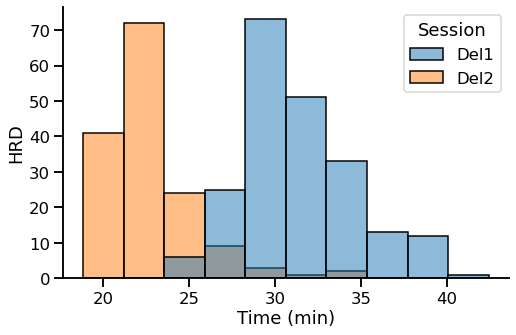

In [16]:
sns.set_context('talk')
plt.figure(figsize=(8, 5))
sns.histplot(data=group_df[group_df.Modality=='Intero'],
             x='TaskDuration', hue='Session')
plt.xlabel('Time (min)')
plt.ylabel('HRD')
sns.despine()